In [1]:
!pip install pandas matplotlib tqdm transformer_lens


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformer_lens.utils import test_prompt
from transformer_lens import HookedTransformer

In [2]:
from utils import plot_against_alt, get_first_order_df, print_mean_and_std, print_num_incorrect, compute_first_order_summary_stats

# GPT-2 Small

In [3]:
# load results
small_df = pd.read_csv('results/small_logits.csv')

In [4]:
print(small_df.columns)
print(small_df.shape)

Index(['template', 'PLACE', 'OBJECT', 'S', 'IO', 'text', 'prompt_toks',
       'logit_diff'],
      dtype='object')
(9313920, 8)


## Global Statistics

In [5]:
global_small_mean, global_small_std = print_mean_and_std(small_df)

Global mean: 3.7937727343427996
Global std: 1.9872322631118449


(array([5.29964248e-07, 2.64982124e-06, 1.05992850e-06, 3.70974974e-06,
        6.35957097e-06, 3.17978549e-06, 5.29964248e-06, 4.45169968e-05,
        1.64288917e-05, 6.20058170e-05, 1.67998667e-04, 2.04036235e-04,
        3.95883293e-04, 4.79087680e-04, 9.39626612e-04, 1.02230103e-03,
        2.23167945e-03, 2.52686953e-03, 3.87456862e-03, 6.48252268e-03,
        9.31465162e-03, 1.32824939e-02, 1.84120179e-02, 2.68734271e-02,
        3.45658581e-02, 4.56002437e-02, 5.97206112e-02, 7.27089750e-02,
        8.94834033e-02, 1.04274705e-01, 1.20987658e-01, 1.36091639e-01,
        1.50757870e-01, 1.65158058e-01, 1.76707569e-01, 1.88351414e-01,
        1.94703035e-01, 1.98062478e-01, 2.01169129e-01, 2.02901052e-01,
        1.97034878e-01, 1.95030553e-01, 1.90151172e-01, 1.83202811e-01,
        1.75763173e-01, 1.67501030e-01, 1.59303013e-01, 1.50518856e-01,
        1.40072201e-01, 1.31540306e-01, 1.20734865e-01, 1.10837253e-01,
        1.01472785e-01, 9.16000805e-02, 8.19144539e-02, 7.384786

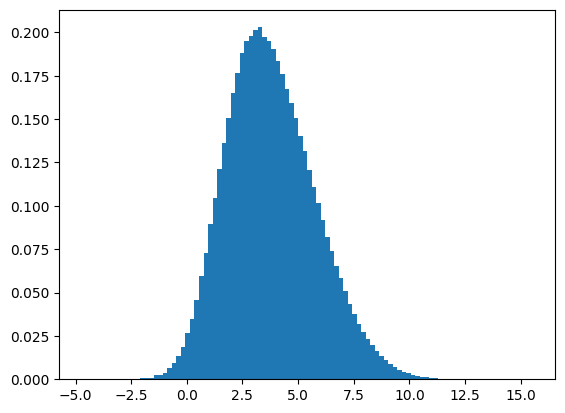

In [6]:
# plot full histogram
plt.hist(small_df['logit_diff'], bins=100,  density=True)

In [7]:
print_num_incorrect(small_df)

# examples with logit diff < 0:	 125583 out of 9313920
% examples with logit diff < 0:	 1.348%


## Digging Down

In [8]:
small_first_df = get_first_order_df(small_df)

Starting  template


100%|██████████| 15/15 [01:33<00:00,  6.20s/it]


Starting  PLACE


100%|██████████| 8/8 [00:55<00:00,  6.90s/it]


Starting  OBJECT


100%|██████████| 8/8 [00:56<00:00,  7.08s/it]


Starting  S


100%|██████████| 99/99 [09:51<00:00,  5.98s/it]


Starting  IO


100%|██████████| 99/99 [09:52<00:00,  5.98s/it]


In [11]:
small_first_df = compute_first_order_summary_stats(small_first_df, global_small_mean, global_small_std)

In [12]:
small_first_df.columns

Index(['col', 'val', 'mean', 'std', 'alt_mean', 'alt_std', 'global_mean_diff',
       'global_std_diff', 'relative_mean_diff', 'relative_std_diff'],
      dtype='object')

In [13]:
small_first_df.sort_values("global_mean_diff", ascending=False).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
55,S,Jeffrey,6.501107,1.692153,3.766147,1.970943,2.707334,0.295079,2.734960,0.278790
85,S,Bradley,6.236655,1.688759,3.768845,1.974531,2.442882,0.298473,2.467810,0.285772
66,S,Kenneth,5.900351,2.173847,3.772277,1.973683,2.106578,0.186615,2.128074,0.200164
43,S,Lisa,1.799079,1.359751,3.814127,1.982299,1.994694,0.627481,2.015048,0.622548
3,template,When [B] and [A] got a [OBJECT] at the [PLACE]...,5.769635,1.697381,3.652640,1.930440,1.975863,0.289851,2.116996,0.233059
86,S,Alexander,5.687984,1.680786,3.774444,1.980802,1.894212,0.306446,1.913540,0.300016
5,template,When [B] and [A] got a [OBJECT] at the [PLACE]...,5.681712,1.696412,3.658920,1.937223,1.887940,0.290820,2.022792,0.240811
199,IO,Bradley,1.975523,1.668847,3.812326,1.981638,1.818250,0.318386,1.836803,0.312792
72,S,Amanda,1.993331,1.423134,3.812145,1.983761,1.800442,0.564099,1.818814,0.560627
58,S,Benjamin,5.457250,1.992060,3.776798,1.979993,1.663478,0.004828,1.680452,0.012067


In [14]:
small_first_df.sort_values("relative_mean_diff", ascending=False).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
55,S,Jeffrey,6.501107,1.692153,3.766147,1.970943,2.707334,0.295079,2.734960,0.278790
85,S,Bradley,6.236655,1.688759,3.768845,1.974531,2.442882,0.298473,2.467810,0.285772
66,S,Kenneth,5.900351,2.173847,3.772277,1.973683,2.106578,0.186615,2.128074,0.200164
3,template,When [B] and [A] got a [OBJECT] at the [PLACE]...,5.769635,1.697381,3.652640,1.930440,1.975863,0.289851,2.116996,0.233059
5,template,When [B] and [A] got a [OBJECT] at the [PLACE]...,5.681712,1.696412,3.658920,1.937223,1.887940,0.290820,2.022792,0.240811
43,S,Lisa,1.799079,1.359751,3.814127,1.982299,1.994694,0.627481,2.015048,0.622548
86,S,Alexander,5.687984,1.680786,3.774444,1.980802,1.894212,0.306446,1.913540,0.300016
199,IO,Bradley,1.975523,1.668847,3.812326,1.981638,1.818250,0.318386,1.836803,0.312792
72,S,Amanda,1.993331,1.423134,3.812145,1.983761,1.800442,0.564099,1.818814,0.560627
58,S,Benjamin,5.457250,1.992060,3.776798,1.979993,1.663478,0.004828,1.680452,0.012067


In [17]:
small_first_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
43,S,Lisa,1.799079,1.359751,3.814127,1.982299,1.994694,0.627481,2.015048,0.622548
199,IO,Bradley,1.975523,1.668847,3.812326,1.981638,1.818250,0.318386,1.836803,0.312792
72,S,Amanda,1.993331,1.423134,3.812145,1.983761,1.800442,0.564099,1.818814,0.560627
48,S,Shannon,2.218303,2.007182,3.809849,1.980579,1.575470,0.019950,1.591546,0.026603
75,S,Vanessa,2.315721,1.543558,3.808855,1.985587,1.478052,0.443674,1.493134,0.442030
10,template,"Then, [B] and [A] had a long argument, and aft...",2.348365,1.598096,3.897016,1.972019,1.445408,0.389136,1.548651,0.373923
44,S,Mary,2.370384,1.602570,3.808297,1.985522,1.423388,0.384663,1.437913,0.382952
185,IO,David,2.377378,1.413634,3.808226,1.987037,1.416395,0.573598,1.430848,0.573403
82,S,Amy,2.383882,1.332780,3.808159,1.987655,1.409891,0.654453,1.424278,0.654875
6,template,"Then, [B] and [A] had a long argument. Afterwa...",2.405721,1.682761,3.892919,1.970141,1.388052,0.304472,1.487198,0.287381


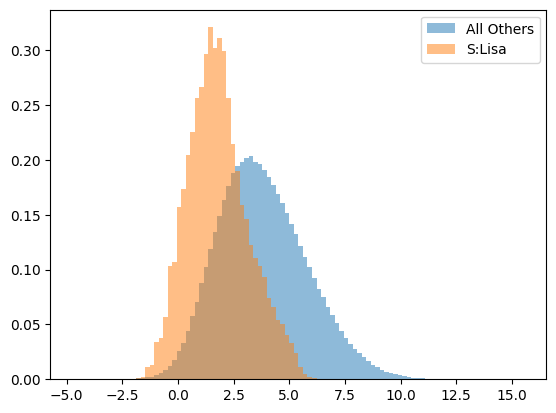

In [18]:
plot_against_alt(small_df, 'S', 'Lisa', label_prefix="")

In [19]:
small_s_df = small_df[small_df["S"] == "Lisa"]

In [20]:
small_s_second_df = get_first_order_df(small_s_df)

Starting  template


100%|██████████| 15/15 [00:01<00:00, 13.24it/s]


Starting  PLACE


100%|██████████| 8/8 [00:00<00:00, 13.16it/s]


Starting  OBJECT


100%|██████████| 8/8 [00:00<00:00, 13.29it/s]


Starting  S


100%|██████████| 1/1 [00:00<00:00, 13.11it/s]


Starting  IO


100%|██████████| 98/98 [00:06<00:00, 14.22it/s]


In [21]:
small_s_second_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std
106,IO,Katie,0.017770,1.187264,1.817443,1.349228
44,IO,Alicia,0.196236,1.065318,1.815603,1.352604
102,IO,Michelle,0.206026,0.938098,1.815502,1.353694
74,IO,Samantha,0.232368,1.106246,1.815231,1.352706
90,IO,Lindsay,0.275709,0.938980,1.814784,1.354523
39,IO,Sara,0.385149,1.315619,1.813656,1.352529
36,IO,Laura,0.583636,0.955124,1.811610,1.357646
77,IO,Stephanie,0.594710,1.121147,1.811495,1.356440
100,IO,Kristen,0.614060,1.037480,1.811296,1.357303
75,IO,Christina,0.652787,1.077171,1.810897,1.357331


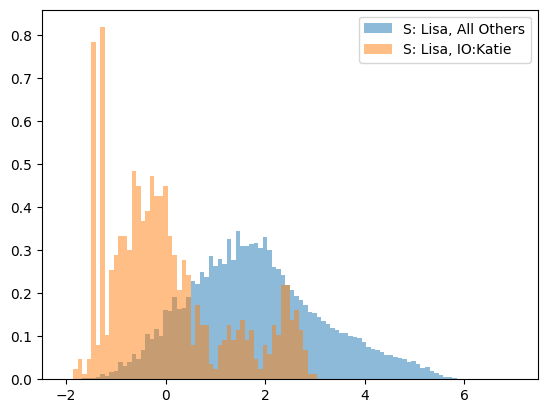

In [23]:
plot_against_alt(small_s_df, "IO", "Katie", label_prefix="S: Lisa, ")

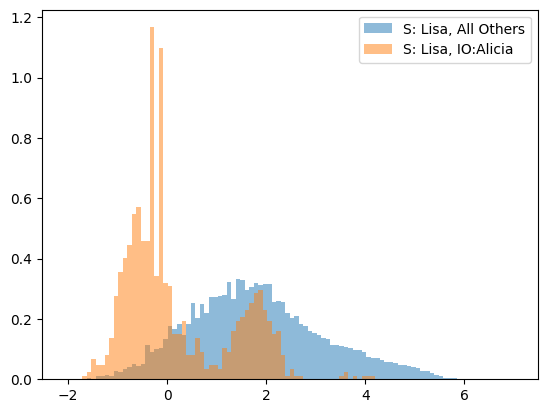

In [24]:
plot_against_alt(small_s_df, "IO", "Alicia", label_prefix="S: Lisa, ")

In [25]:
model = HookedTransformer.from_pretrained("gpt2")
tokenizer = model.tokenizer

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2 into HookedTransformer


In [26]:
small_s_io_df = small_s_df[small_s_df["IO"] == "Alicia"]
toks = small_s_io_df.iloc[0]['prompt_toks'][1:-1].split(', ')
toks = [int(t) for t in toks]
prompt = tokenizer.decode(toks)
prompt

'Then, Lisa and Alicia were working at the store. Lisa decided to give a computer to'

In [27]:
test_prompt(prompt, "Alicia", model)

Tokenized prompt: ['<|endoftext|>', 'Then', ',', ' Lisa', ' and', ' Alicia', ' were', ' working', ' at', ' the', ' store', '.', ' Lisa', ' decided', ' to', ' give', ' a', ' computer', ' to']
Tokenized answer: [' Alicia']


Performance on answer token:
Rank: 4        Logit: 14.68 Prob:  7.43% Token: | Alicia|

Top 0th token. Logit: 15.83 Prob: 23.56% Token: | her|
Top 1th token. Logit: 15.25 Prob: 13.18% Token: | Lisa|
Top 2th token. Logit: 15.12 Prob: 11.57% Token: | the|
Top 3th token. Logit: 14.90 Prob:  9.28% Token: | them|
Top 4th token. Logit: 14.68 Prob:  7.43% Token: | Alicia|
Top 5th token. Logit: 13.75 Prob:  2.93% Token: | a|
Top 6th token. Logit: 13.19 Prob:  1.68% Token: | one|
Top 7th token. Logit: 13.05 Prob:  1.47% Token: | their|
Top 8th token. Logit: 12.51 Prob:  0.85% Token: | him|
Top 9th token. Logit: 12.30 Prob:  0.69% Token: | someone|


Ranks of the answer tokens: [(' Alicia', 4)]

# GPT-2 Medium

In [28]:
med_df = pd.read_csv('results/medium_logits.csv')

In [29]:
print(med_df.columns)
print(med_df.shape)

Index(['template', 'PLACE', 'OBJECT', 'S', 'IO', 'text', 'prompt_toks',
       'logit_diff'],
      dtype='object')
(9313920, 8)


## Global Statistics

In [30]:
global_med_mean, global_med_std = print_mean_and_std(med_df)

Global mean: 4.179841006053221
Global std: 1.4802102392905077


(array([1.55343940e-06, 2.33015910e-06, 2.33015910e-06, 8.54391672e-06,
        1.94179925e-05, 4.11661442e-05, 7.06814928e-05, 1.13401076e-04,
        1.99616963e-04, 3.05250843e-04, 5.18072041e-04, 8.69926066e-04,
        1.30100550e-03, 2.03422890e-03, 2.95231159e-03, 4.58109280e-03,
        6.42968569e-03, 9.15985544e-03, 1.28943238e-02, 1.76059055e-02,
        2.30980905e-02, 3.07992663e-02, 3.89975428e-02, 4.98956969e-02,
        6.15472691e-02, 7.47173284e-02, 8.84567232e-02, 1.03941407e-01,
        1.19290942e-01, 1.36631986e-01, 1.52790086e-01, 1.69653447e-01,
        1.85347069e-01, 2.00081442e-01, 2.13763359e-01, 2.26381171e-01,
        2.35935600e-01, 2.44663599e-01, 2.49223720e-01, 2.53818794e-01,
        2.56124098e-01, 2.59530014e-01, 2.59027477e-01, 2.59518363e-01,
        2.55362136e-01, 2.49586449e-01, 2.46958806e-01, 2.31202270e-01,
        2.26771084e-01, 2.14029774e-01, 1.97947016e-01, 1.87685772e-01,
        1.73025964e-01, 1.62708020e-01, 1.45370859e-01, 1.335243

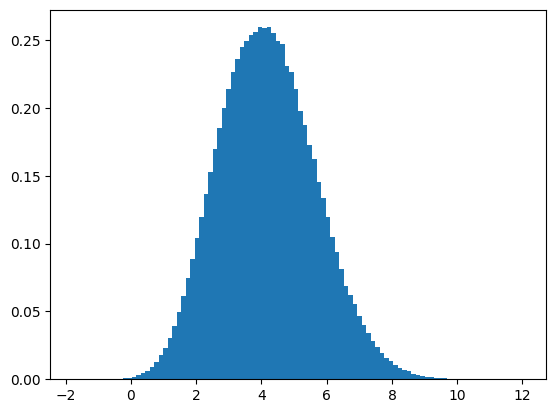

In [31]:
# plot full histogram
plt.hist(med_df['logit_diff'], bins=100,  density=True)

In [32]:
print_num_incorrect(med_df)

# examples with logit diff < 0:	 4143 out of 9313920
% examples with logit diff < 0:	 0.044%


## Digging Down

In [33]:
med_first_df = get_first_order_df(med_df)
med_first_df = compute_first_order_summary_stats(med_first_df, global_med_mean, global_med_std)

Starting  template


100%|██████████| 15/15 [01:31<00:00,  6.07s/it]


Starting  PLACE


100%|██████████| 8/8 [00:50<00:00,  6.33s/it]


Starting  OBJECT


100%|██████████| 8/8 [00:49<00:00,  6.17s/it]


Starting  S


100%|██████████| 99/99 [09:38<00:00,  5.84s/it]


Starting  IO


100%|██████████| 99/99 [09:39<00:00,  5.86s/it]


In [43]:
med_first_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
50,S,Amy,2.785938,1.297383,4.194065,1.475187,1.393903,0.182827,1.408126,0.177803
92,S,Megan,2.792171,1.318886,4.194001,1.475053,1.387670,0.161324,1.401830,0.156166
1,template,"Then, [B] and [A] had a lot of fun at the [PLA...",2.846518,1.098194,4.275078,1.457850,1.333323,0.382016,1.428560,0.359656
126,S,Emily,2.937011,1.414256,4.192523,1.475482,1.242830,0.065954,1.255512,0.061226
7,template,"Then, [B] and [A] were thinking about going to...",3.014394,1.173248,4.263087,1.464668,1.165447,0.306963,1.248693,0.291421
109,S,Jesse,3.017221,1.024058,4.191704,1.479441,1.162620,0.456153,1.174483,0.455383
2,template,"Then, [B] and [A] went to the [PLACE]. [B] gav...",3.089374,1.145392,4.257732,1.470650,1.090467,0.334818,1.168358,0.325258
58,S,Mary,3.122251,1.358816,4.190633,1.477501,1.057590,0.121394,1.068382,0.118685
95,S,Sean,3.259922,1.272692,4.189228,1.479232,0.919919,0.207518,0.929306,0.206540
115,S,John,3.281641,1.049242,4.189006,1.481158,0.898200,0.430968,0.907365,0.431917


In [46]:
med_df[med_df['logit_diff'] < 0]

,template,PLACE,OBJECT,S,IO,text,prompt_toks,logit_diff
1764,"While [B] and [A] were working at the [PLACE],...",school,basketball,William,Mary,While William and Mary were working at the sch...,"[3633, 3977, 290, 5335, 547, 1762, 379, 262, 1...",-0.754412
9336,"Then, [B] and [A] went to the [PLACE]. [B] gav...",restaurant,bone,Steven,Stephen,"Then, Steven and Stephen went to the restauran...","[6423, 11, 8239, 290, 7970, 1816, 284, 262, 70...",-0.317159
11512,"Then, [B] and [A] had a lot of fun at the [PLA...",store,bone,Ashley,Bradley,"Then, Ashley and Bradley had a lot of fun at t...","[6423, 11, 20899, 290, 16182, 550, 257, 1256, ...",-0.409494
15400,"After the lunch, [B] and [A] went to the [PLAC...",school,computer,William,Mary,"After the lunch, William and Mary went to the ...","[3260, 262, 9965, 11, 3977, 290, 5335, 1816, 2...",-0.359272
15999,"Then, [B] and [A] were thinking about going to...",store,bone,Amy,Megan,"Then, Amy and Megan were thinking about going ...","[6423, 11, 14235, 290, 27616, 547, 3612, 546, ...",-0.640326
...,...,...,...,...,...,...,...,...
9307970,"Then, [B] and [A] were thinking about going to...",school,ring,Steven,Aaron,"Then, Steven and Aaron were thinking about goi...","[6423, 11, 8239, 290, 12139, 547, 3612, 546, 1...",-0.246918
9308626,"Then, [B] and [A] were thinking about going to...",house,basketball,Megan,Melissa,"Then, Megan and Melissa were thinking about go...","[6423, 11, 27616, 290, 24164, 547, 3612, 546, ...",-0.310487
9308746,While [B] and [A] were commuting to the [PLACE...,restaurant,snack,William,Mary,While William and Mary were commuting to the r...,"[3633, 3977, 290, 5335, 547, 45309, 284, 262, ...",-0.092196
9310124,"Then, [B] and [A] were thinking about going to...",hospital,basketball,Emily,Melissa,"Then, Emily and Melissa were thinking about go...","[6423, 11, 17608, 290, 24164, 547, 3612, 546, ...",-0.218410


# GPT-2 Large

In [36]:
large_df = pd.read_csv('results/large_logits.csv')

In [37]:
print(large_df.columns)
print(large_df.shape)

Index(['template', 'PLACE', 'OBJECT', 'S', 'IO', 'text', 'prompt_toks',
       'logit_diff'],
      dtype='object')
(9313920, 8)


## Global Statistics

In [38]:
global_large_mean, global_large_std = print_mean_and_std(large_df)

Global mean: 4.679166049313954
Global std: 1.6852265274474034


(array([1.07608750e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.61413126e-06, 0.00000000e+00, 5.38043752e-07, 1.61413126e-06,
        2.15217501e-06, 2.69021876e-06, 1.61413126e-06, 2.15217501e-06,
        8.60870004e-06, 4.30435002e-06, 3.22826251e-06, 4.84239377e-06,
        3.76630627e-06, 9.68478754e-06, 1.50652251e-05, 1.61413126e-05,
        1.82934876e-05, 2.63641439e-05, 2.95924064e-05, 4.08913252e-05,
        5.97228565e-05, 8.66250441e-05, 1.19445713e-04, 1.78630526e-04,
        2.78168620e-04, 5.46652452e-04, 8.25897160e-04, 1.31336480e-03,
        2.27592507e-03, 3.71788233e-03, 6.27789450e-03, 9.38240695e-03,
        1.40515506e-02, 2.04677224e-02, 2.88816506e-02, 3.92013297e-02,
        5.18448199e-02, 6.59942945e-02, 8.17616666e-02, 9.91759907e-02,
        1.16948114e-01, 1.36502776e-01, 1.55119628e-01, 1.73690746e-01,
        1.92469549e-01, 2.06243469e-01, 2.18742225e-01, 2.27296583e-01,
        2.33452880e-01, 2.35259093e-01, 2.34882462e-01, 2.338709

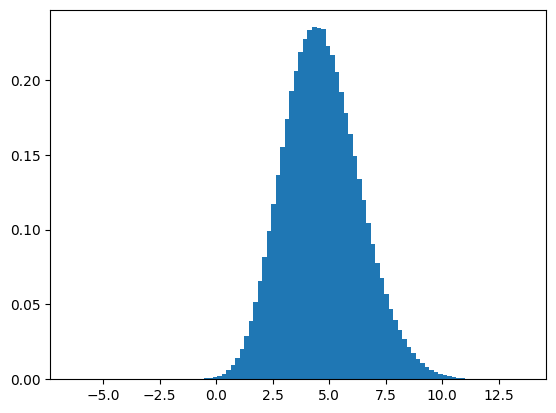

In [39]:
# plot full histogram
plt.hist(large_df['logit_diff'], bins=100,  density=True)

In [40]:
print_num_incorrect(large_df)

# examples with logit diff < 0:	 5986 out of 9313920
% examples with logit diff < 0:	 0.064%


In [41]:
large_first_df = get_first_order_df(large_df)
large_first_df = compute_first_order_summary_stats(large_first_df, global_large_mean, global_large_std)

Starting  template


100%|██████████| 15/15 [01:36<00:00,  6.41s/it]


Starting  PLACE


100%|██████████| 8/8 [00:56<00:00,  7.04s/it]


Starting  OBJECT


100%|██████████| 8/8 [01:00<00:00,  7.56s/it]


Starting  S


100%|██████████| 99/99 [10:21<00:00,  6.27s/it]


Starting  IO


100%|██████████| 99/99 [09:44<00:00,  5.91s/it]


In [44]:
large_first_df.sort_values("mean", ascending=True).head(10)

,col,val,mean,std,alt_mean,alt_std,global_mean_diff,global_std_diff,relative_mean_diff,relative_std_diff
11,template,"Afterwards, [B] and [A] went to the [PLACE]. [...",3.280200,1.233128,4.779092,1.668668,1.398966,0.452098,1.498892,0.435540
7,template,"Then, [B] and [A] went to the [PLACE]. [B] gav...",3.336356,1.256816,4.775081,1.670934,1.342810,0.428410,1.438725,0.414118
60,S,Paul,3.344719,1.278767,4.692783,1.683427,1.334447,0.406459,1.348064,0.404659
118,S,Jesse,3.434493,1.541901,4.691867,1.681885,1.244673,0.143326,1.257374,0.139985
182,IO,Gregory,3.437664,1.498797,4.691834,1.682307,1.241502,0.186430,1.254171,0.183510
98,S,James,3.469080,1.183705,4.691514,1.685104,1.210086,0.501521,1.222434,0.501399
83,S,Adam,3.517587,1.490743,4.691019,1.682969,1.161579,0.194483,1.173431,0.192225
4,template,"After the lunch, [B] and [A] went to the [PLAC...",3.562235,1.216291,4.758947,1.685735,1.116931,0.468936,1.196712,0.469444
120,S,John,3.621191,1.205677,4.689962,1.686000,1.057975,0.479550,1.068771,0.480324
31,S,Mary,3.639208,1.470657,4.689778,1.683969,1.039958,0.214569,1.050570,0.213311


In [45]:
large_df[large_df['logit_diff'] < 0]

,template,PLACE,OBJECT,S,IO,text,prompt_toks,logit_diff
3407,"Afterwards, [B] and [A] went to the [PLACE]. [...",station,ring,John,Sean,"Afterwards, John and Sean went to the station....","[3260, 2017, 11, 1757, 290, 11465, 1816, 284, ...",-1.089462
4553,"Then, [B] and [A] went to the [PLACE]. [B] gav...",office,drink,Timothy,Paul,"Then, Timothy and Paul went to the office. Tim...","[6423, 11, 22283, 290, 3362, 1816, 284, 262, 2...",-0.343878
6422,"Then, [B] and [A] were thinking about going to...",store,bone,Ashley,Samantha,"Then, Ashley and Samantha were thinking about ...","[6423, 11, 20899, 290, 34778, 547, 3612, 546, ...",-0.054685
10112,"Then, [B] and [A] went to the [PLACE]. [B] gav...",garden,ring,Aaron,James,"Then, Aaron and James went to the garden. Aaro...","[6423, 11, 12139, 290, 3700, 1816, 284, 262, 1...",-3.063119
10603,"After the lunch, [B] and [A] went to the [PLAC...",school,ring,Eric,Erica,"After the lunch, Eric and Erica went to the sc...","[3260, 262, 9965, 11, 7651, 290, 45187, 1816, ...",-0.176732
...,...,...,...,...,...,...,...,...
9295233,"After the lunch, [B] and [A] went to the [PLAC...",office,ring,Lindsay,Lindsey,"After the lunch, Lindsay and Lindsey went to t...","[3260, 262, 9965, 11, 33127, 290, 30334, 1816,...",-0.049021
9295808,"Afterwards, [B] and [A] went to the [PLACE]. [...",station,ring,John,Erin,"Afterwards, John and Erin went to the station....","[3260, 2017, 11, 1757, 290, 28894, 1816, 284, ...",-0.394150
9299590,"Then, [B] and [A] went to the [PLACE]. [B] gav...",station,snack,Mary,Katherine,"Then, Mary and Katherine went to the station. ...","[6423, 11, 5335, 290, 32719, 1816, 284, 262, 4...",-0.136243
9300053,"Then, [B] and [A] went to the [PLACE]. [B] gav...",station,ring,Sarah,Heather,"Then, Sarah and Heather went to the station. S...","[6423, 11, 10490, 290, 24253, 1816, 284, 262, ...",-0.328880
